In [1]:
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("clean_zillow.csv")

In [3]:
train, validate, test = wrangle.split_zillow(df)

In [4]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

In [5]:
A = train[['logerror', 'house_age']]
A.head()

,logerror,house_age
14991,0.056420,80.0
19544,0.004884,46.0
681,0.000922,61.0
3514,0.021881,73.0
34566,-0.017494,16.0


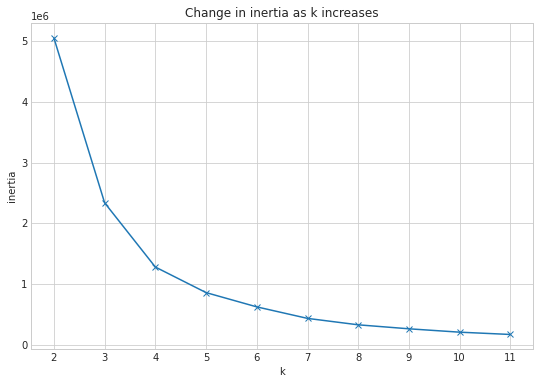

In [6]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(A).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# 5 and 6 look good lets try 5

In [8]:
scaler = StandardScaler().fit(A)
A_scaled = pd.DataFrame(scaler.transform(A), columns= A.columns).set_index([A.index.values])

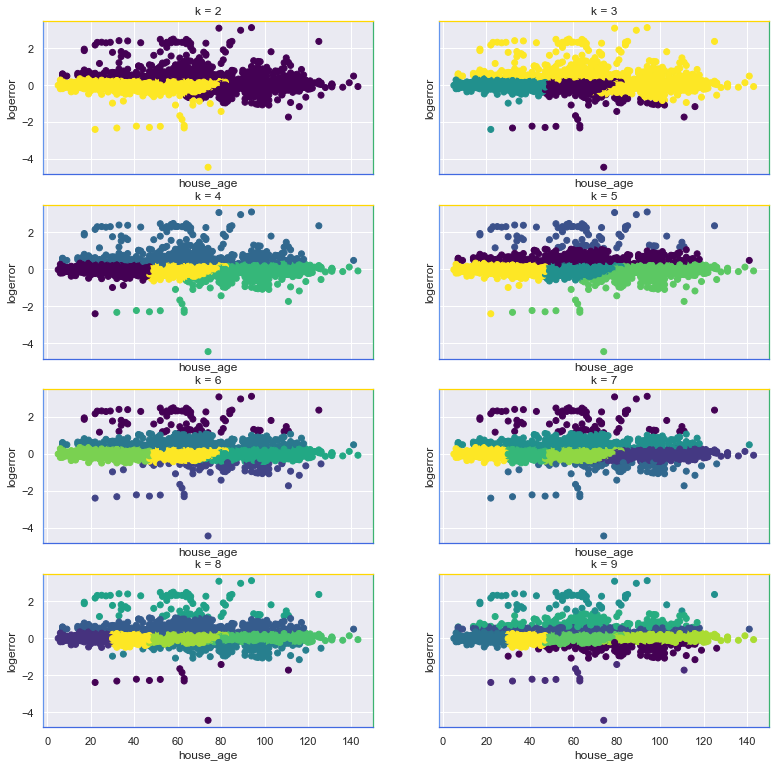

In [20]:
fig, axs = plt.subplots(4, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 10)):
    clusters = KMeans(k).fit(A_scaled).predict(A_scaled)
    ax.scatter(A.house_age, A.logerror, c=clusters, cmap='viridis_r')
    ax.spines["bottom"].set_color("royalblue")
    ax.spines["left"].set_color("cornflowerblue")
    ax.spines["top"].set_color("gold")
    ax.spines["right"].set_color("mediumseagreen")
    ax.set(title='k = {}'.format(k), xlabel='house_age', ylabel='logerror')

In [10]:
#define the thing
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(A_scaled)

# Use (predict using) the thing 
kmeans.predict(A_scaled)

array([4, 1, 3, ..., 3, 1, 1], dtype=int32)

In [11]:
train['model1_cluster'] = kmeans.predict(A_scaled)
A_scaled['model1_cluster'] = kmeans.predict(A_scaled)
train.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_orange_county,in_ventura,house_age,tax_rate,acres,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins,model1_cluster
14991,11724867,261.0,1,1.0,4.0,6.0,1570.0,6037.0,0.0,1.0,...,0,0,80.0,81.480056,0.151538,Accurate,4,0,1,4
19544,12128007,261.0,1,2.0,3.0,8.0,2306.0,6037.0,0.0,2.0,...,0,0,46.0,83.868458,0.301354,Accurate,5,1,3,1
681,10757399,261.0,1,3.0,4.0,7.0,2309.0,6037.0,0.0,3.0,...,0,0,61.0,77.918010,0.219972,Accurate,5,0,2,3
3514,10911485,261.0,1,3.0,3.0,8.0,1912.0,6037.0,0.0,3.0,...,0,0,73.0,82.224030,0.153329,Accurate,4,0,1,3
34566,13903643,261.0,0,3.0,4.0,6.0,2539.0,6059.0,0.0,3.0,...,1,0,16.0,73.929172,0.104913,Accurate,6,0,1,1


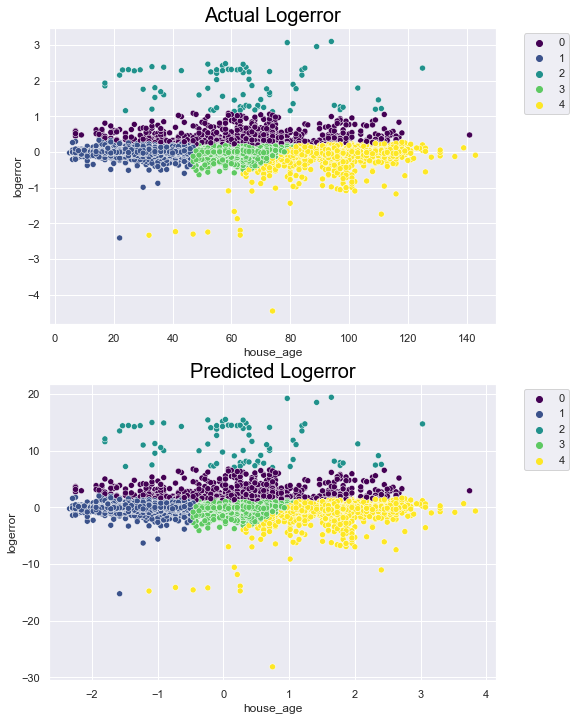

In [12]:
plt.subplots(5, 1, figsize=(8,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plt.title("Actual Logerror", size=20, color='black')
sns.scatterplot(data=train, x='house_age', y='logerror', hue='model1_cluster', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(2,1,2)
plt.title("Predicted Logerror", size=20, color='black')
sns.scatterplot(data=A_scaled, x='house_age', y='logerror', hue='model1_cluster', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [13]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = A.columns)
centroids_scaled

,logerror,house_age
0,2.316368,0.381672
1,-0.066513,-1.139903
2,11.470893,0.247753
3,-0.095838,0.251115
4,-0.334266,1.592137


In [14]:
centroids = train.groupby('model1_cluster')['logerror', 'house_age'].mean()
centroids

,logerror,house_age
model1_cluster,,
0,0.386303,65.840538
1,0.006582,31.771869
2,1.840267,62.797468
3,0.001977,62.872739
4,-0.035986,92.853204


In [15]:
kmeans.labels_

array([4, 1, 3, ..., 3, 1, 1], dtype=int32)

<Figure size 1008x648 with 0 Axes>

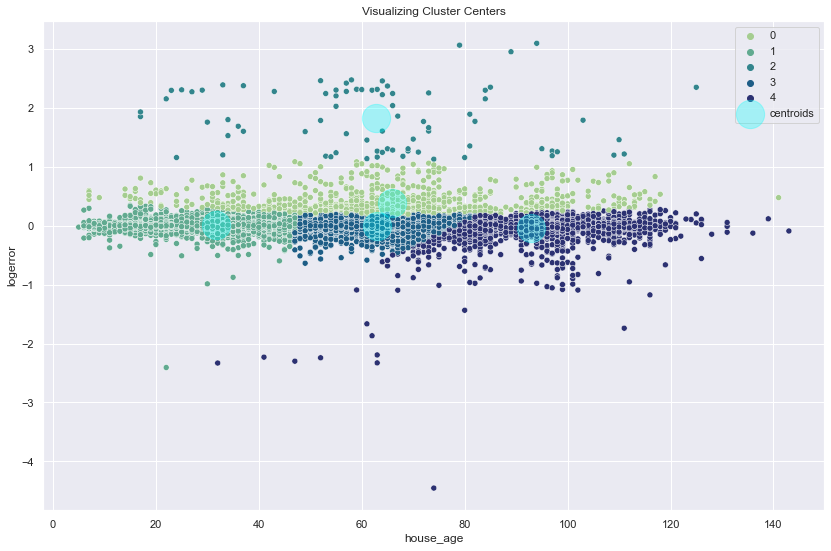

In [16]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='house_age', y='logerror', data=train, hue='model1_cluster', palette='crest')

# plot cluster centers (centroids)
centroids.plot.scatter(x='house_age', y='logerror', ax = plt.gca(), color ='cyan', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [17]:
scaler = StandardScaler().fit(A)
A_scaled = pd.DataFrame(scaler.transform(A), columns= A.columns).set_index([A.index.values])

<AxesSubplot:xlabel='house_age', ylabel='logerror'>

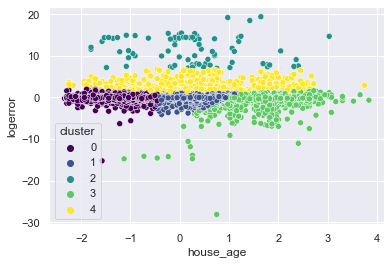

In [18]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(A_scaled)
A_scaled['cluster'] = kmeans.predict(A_scaled)
sns.scatterplot(x='house_age', y='logerror', data=A_scaled, hue='cluster', palette='viridis')

In [19]:
k = 5

kmeans = KMeans(n_clusters= k)
kmeans.fit(A_scaled)
kmeans.inertia_

17552.782862873453